# 0. Importación de librerías 

En las siguientes líneas de código se importan las librerías y herramientas necesarias para desarrollar el caso de uso.

In [1]:
import pandas as pd
pd.set_option('display.max_columns', 25) # Número máximo de columnas a mostrar
pd.set_option('display.max_rows', 50) # Numero máximo de filas a mostar

import numpy as np
np.random.seed(3301)

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

# 1. Carga de los datos
A través de la librería **pandas** podemos realizar la carga de datos desde diferentes fuentes de información, en este caso se realizará la carga de un archivo plano csv, el separador del archivo es ; y se remplazaron los valores "-" por valores nulos.

In [2]:
# Se cargan los datos. 
df_banco=pd.read_csv('BancAlpes.csv', sep=',', encoding = 'utf-8', header=0, na_values={"??"}, dtype={0:"string", 1:"string"})

In [3]:
# Cantidad de datos y número de variables
df_banco.shape

(5530, 15)

In [4]:
# Mostrar los datos
df_banco.head()

,CUST_ID,GENDER,BALANCE,PURCHASES,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_FREQUENCY,PURCHASES_TRX,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,C12529,F,107.944741,118.16,0.875,472.818286,1.0,0.125000,2,0.125,0.125000,2500.0,192.781455,56.999671,8
1,C14138,<NA>,241.032979,0.00,1.000,642.862505,1.0,0.000000,0,NaN,0.083333,1500.0,915.454305,195.162256,12
2,C15409,<NA>,894.357857,1164.00,1.000,0.0,0.0,1.000000,12,NaN,0.000000,2000.0,907.603723,270.413449,-12
3,C18141,F,-188.132508,515.88,1.000,0.0,NaN,0.833333,14,NaN,0.000000,2700.0,601.729266,194.534934,12
4,C15879,<NA>,3881.679582,15.92,1.000,2183.782456,9.0,0.083333,1,NaN,0.333333,5500.0,1032.183632,1129.747227,12


In [5]:
# Podemos ver los tipos de todas la variables.
df_banco.dtypes

CUST_ID                        string
GENDER                         string
BALANCE                       float64
PURCHASES                     float64
BALANCE_FREQUENCY             float64
CASH_ADVANCE                   object
CASH_ADVANCE_TRX              float64
PURCHASES_FREQUENCY           float64
PURCHASES_TRX                  object
ONEOFF_PURCHASES_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY        float64
CREDIT_LIMIT                  float64
PAYMENTS                      float64
MINIMUM_PAYMENTS               object
TENURE                         object
dtype: object

In [6]:
# Se observa que hay ausencias y luego posteriormente cuandos se reliza la eliminiación de datos no numericos en las variables se encuentra que se puede realizar puesto que la diferencia no es significativa
df_banco.isnull().sum()

CUST_ID                          0
GENDER                        2714
BALANCE                          0
PURCHASES                        0
BALANCE_FREQUENCY                0
CASH_ADVANCE                    75
CASH_ADVANCE_TRX               150
PURCHASES_FREQUENCY              0
PURCHASES_TRX                   65
ONEOFF_PURCHASES_FREQUENCY    2740
CASH_ADVANCE_FREQUENCY         166
CREDIT_LIMIT                     0
PAYMENTS                         0
MINIMUM_PAYMENTS                89
TENURE                         232
dtype: int64

In [7]:
# Vamos a cambiar el tipo de dato de la variable CASH_ADVANCED, PURCHASES_TRX,MINIMUM_PAYMENTS y TENURE para eliminar todos los valores que no sean numericos.
df_banco['CASH_ADVANCE'] = df_banco['CASH_ADVANCE'].apply(pd.to_numeric, errors='coerce')
df_banco['PURCHASES_TRX'] = df_banco['PURCHASES_TRX'].apply(pd.to_numeric, errors='coerce')
df_banco['MINIMUM_PAYMENTS'] = df_banco['MINIMUM_PAYMENTS'].apply(pd.to_numeric, errors='coerce')
df_banco['TENURE'] = df_banco['TENURE'].apply(pd.to_numeric, errors='coerce')

In [8]:
# Podemos ver los tipos de todas la variables.
df_banco.dtypes

CUST_ID                        string
GENDER                         string
BALANCE                       float64
PURCHASES                     float64
BALANCE_FREQUENCY             float64
CASH_ADVANCE                  float64
CASH_ADVANCE_TRX              float64
PURCHASES_FREQUENCY           float64
PURCHASES_TRX                 float64
ONEOFF_PURCHASES_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY        float64
CREDIT_LIMIT                  float64
PAYMENTS                      float64
MINIMUM_PAYMENTS              float64
TENURE                        float64
dtype: object

In [9]:
# Se observa que hay ausencias sin embargo en los datos eliminados no numericos no son significativos la diferencia
df_banco.isnull().sum()

CUST_ID                          0
GENDER                        2714
BALANCE                          0
PURCHASES                        0
BALANCE_FREQUENCY                0
CASH_ADVANCE                   159
CASH_ADVANCE_TRX               150
PURCHASES_FREQUENCY              0
PURCHASES_TRX                  147
ONEOFF_PURCHASES_FREQUENCY    2740
CASH_ADVANCE_FREQUENCY         166
CREDIT_LIMIT                     0
PAYMENTS                         0
MINIMUM_PAYMENTS               167
TENURE                         296
dtype: int64

In [10]:
# Mostrar los datos
df_banco.head()

,CUST_ID,GENDER,BALANCE,PURCHASES,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_FREQUENCY,PURCHASES_TRX,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,C12529,F,107.944741,118.16,0.875,472.818286,1.0,0.125000,2.0,0.125,0.125000,2500.0,192.781455,56.999671,8.0
1,C14138,<NA>,241.032979,0.00,1.000,642.862505,1.0,0.000000,0.0,NaN,0.083333,1500.0,915.454305,195.162256,12.0
2,C15409,<NA>,894.357857,1164.00,1.000,0.000000,0.0,1.000000,12.0,NaN,0.000000,2000.0,907.603723,270.413449,-12.0
3,C18141,F,-188.132508,515.88,1.000,0.000000,NaN,0.833333,14.0,NaN,0.000000,2700.0,601.729266,194.534934,12.0
4,C15879,<NA>,3881.679582,15.92,1.000,2183.782456,9.0,0.083333,1.0,NaN,0.333333,5500.0,1032.183632,1129.747227,12.0


In [11]:
# Y hacer una decsripción de los datos
df_banco.describe()

,BALANCE,PURCHASES,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_FREQUENCY,PURCHASES_TRX,ONEOFF_PURCHASES_FREQUENCY,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
count,5530.000000,5530.000000,5530.000000,5371.000000,5380.000000,5530.000000,5383.000000,2790.000000,5364.000000,5530.000000,5530.000000,5363.000000,5234.00000
mean,1041.700463,534.577103,26.482552,665.618739,49.115428,12.206006,200.414453,0.148298,0.119005,3588.095256,1107.989817,426.652077,10.80684
std,1353.093044,773.488745,152.899316,1166.074038,573.817771,93.757671,1633.642802,0.241687,0.173206,2640.396238,1270.892564,408.708631,4.06891
min,-4587.892398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.056466,0.019163,-12.00000
25%,74.060304,0.000000,0.833333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1500.000000,345.431102,156.061179,12.00000
50%,632.743634,269.130000,1.000000,0.000000,0.000000,0.363636,6.000000,0.000000,0.000000,2900.000000,671.001700,250.871811,12.00000
75%,1545.808455,723.700000,1.000000,934.381117,3.000000,0.833333,12.000000,0.166667,0.166667,5000.000000,1354.931507,577.575834,12.00000
max,7390.198560,9661.370000,1000.000000,6448.247202,18000.000000,1000.000000,26000.000000,1.000000,1.500000,12500.000000,9933.622610,1998.400995,12.00000


# 2. Limpieza y preparación de los datos

Primero vamos a ejecutar los pasos de limpieza de los datos, relacionados el tratamiento de ausencias y registros duplicados.

In [12]:
# Es recomendable que todos los pasos de limpieza y preparación se realicen sobre otro archivo.
df_banco_t = df_banco

In [13]:
# Se observa que hay ausencias, hay una gran cantidad de datos numeros en el GENDER y en ONEOFF_PURCHARSE_FREQUENCY, dandonos cuenta que son más de la mitad de los datos
df_banco_t.isnull().sum()

CUST_ID                          0
GENDER                        2714
BALANCE                          0
PURCHASES                        0
BALANCE_FREQUENCY                0
CASH_ADVANCE                   159
CASH_ADVANCE_TRX               150
PURCHASES_FREQUENCY              0
PURCHASES_TRX                  147
ONEOFF_PURCHASES_FREQUENCY    2740
CASH_ADVANCE_FREQUENCY         166
CREDIT_LIMIT                     0
PAYMENTS                         0
MINIMUM_PAYMENTS               167
TENURE                         296
dtype: int64

In [14]:
# Por lo anterior mencionado se tomo la desición de eliminar estas dos columnas para poder eliminar los datos repetidos y duplicados en las otras columnas
#Además borramos el CUST_ID puesto que no es relevante
df_banco_t=df_banco_t.drop(['GENDER','ONEOFF_PURCHASES_FREQUENCY','CUST_ID'],axis=1) 

In [15]:
df_banco_t.isnull().sum()

BALANCE                     0
PURCHASES                   0
BALANCE_FREQUENCY           0
CASH_ADVANCE              159
CASH_ADVANCE_TRX          150
PURCHASES_FREQUENCY         0
PURCHASES_TRX             147
CASH_ADVANCE_FREQUENCY    166
CREDIT_LIMIT                0
PAYMENTS                    0
MINIMUM_PAYMENTS          167
TENURE                    296
dtype: int64

In [16]:
# Eliminación registros con ausencias
df_banco_t = df_banco_t.dropna()
# Eliminación de registros duplicados.
df_banco_t = df_banco_t.drop_duplicates()

In [17]:
# Cantidad de datos y número de variables
df_banco_t.shape

(4537, 12)

In [18]:
## Se siguen las reglas del diccionario
df_banco_t = df_banco_t[df_banco_t["BALANCE"].between(0, 5000)]
df_banco_t = df_banco_t[df_banco_t["PURCHASES"].between(0, 15000)]
df_banco_t = df_banco_t[df_banco_t["CASH_ADVANCE"].between(0, 5000)]
df_banco_t = df_banco_t[df_banco_t["CASH_ADVANCE_TRX"].between(0, 15)]
df_banco_t = df_banco_t[df_banco_t["PURCHASES_TRX"].between(0, 30)]
df_banco_t = df_banco_t[df_banco_t["CREDIT_LIMIT"].between(0, 10000)]
df_banco_t = df_banco_t[df_banco_t["PAYMENTS"].between(0, 10000)]
df_banco_t = df_banco_t[df_banco_t["MINIMUM_PAYMENTS"].between(0, 1200)]
df_banco_t = df_banco_t[df_banco_t["TENURE"].between(1, 12)]

In [19]:
# Cantidad de datos y número de variables
df_banco_t.shape

(3675, 12)

In [20]:
df_banco_t.describe()

,BALANCE,PURCHASES,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_FREQUENCY,PURCHASES_TRX,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
count,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.00000
mean,847.341146,526.017211,26.376416,511.508232,1.821224,13.391777,7.588299,0.099313,3254.616808,1012.370935,332.174438,11.43619
std,938.796767,758.201505,152.672085,924.527406,3.013197,98.904201,7.870898,0.150642,2282.505107,1167.371047,269.657030,1.44955
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.056466,0.019163,6.00000
25%,71.931534,15.200000,0.818182,0.000000,0.000000,0.083333,1.000000,0.000000,1500.000000,315.497335,149.297730,12.00000
50%,504.248851,270.000000,1.000000,0.000000,0.000000,0.416667,6.000000,0.000000,2500.000000,597.906134,215.215582,12.00000
75%,1318.239147,712.685000,1.000000,708.919282,3.000000,0.833333,12.000000,0.166667,4500.000000,1223.417940,464.462323,12.00000
max,4732.373540,9661.370000,1000.000000,4961.005282,15.000000,1000.000000,30.000000,1.000000,10000.000000,9724.871142,1196.937133,12.00000


In [21]:
# Cantidad de datos y número de variables
df_banco_t.shape

(3675, 12)

In [22]:
df_banco_t.dtypes

BALANCE                   float64
PURCHASES                 float64
BALANCE_FREQUENCY         float64
CASH_ADVANCE              float64
CASH_ADVANCE_TRX          float64
PURCHASES_FREQUENCY       float64
PURCHASES_TRX             float64
CASH_ADVANCE_FREQUENCY    float64
CREDIT_LIMIT              float64
PAYMENTS                  float64
MINIMUM_PAYMENTS          float64
TENURE                    float64
dtype: object

In [25]:
# Podemos ver como quedaron los datos
df_banco_t.head()

,BALANCE,PURCHASES,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_FREQUENCY,PURCHASES_TRX,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
0,107.944741,118.16,0.875,472.818286,1.0,0.125000,2.0,0.125000,2500.0,192.781455,56.999671,8.0
1,241.032979,0.00,1.000,642.862505,1.0,0.000000,0.0,0.083333,1500.0,915.454305,195.162256,12.0
4,3881.679582,15.92,1.000,2183.782456,9.0,0.083333,1.0,0.333333,5500.0,1032.183632,1129.747227,12.0
5,1087.784698,0.00,1.000,1562.703953,2.0,0.000000,0.0,0.166667,1500.0,3093.888643,298.011965,12.0
6,1081.065726,554.85,1.000,952.424906,8.0,0.500000,20.0,0.166667,2100.0,1898.828120,382.716751,12.0


Calculamos la correlacion entre las variables ver que variables seran las mas importantes para predicir nuestra variable de salida. En este caso podemos ver que la glucosa puede ser importante en la prediccion.

In [27]:
# Revisión del total de registros
df_banco_t.shape

(3675, 12)

# 3. Construcción del modelo

Los algoritmos supervisados implementados en scikit-learn requieren que las variables de entrada estén separadas de la variable objetivo. 

In [28]:
df_results = pd.DataFrame()

In [30]:
mms = MinMaxScaler()
mms.fit(df_banco_t)
X = mms.transform(df_banco_t)

df_X = pd.DataFrame(data=X, columns=["BALANCE",
                              "PURCHASES",
                              "BALANCE_FREQUENCY",
                              "CASH_ADVANCE",
                              "CASH_ADVANCE_TRX",
                              "PURCHASES_FREQUENCY",
                              "PURCHASES_TRX",
                              "CASH_ADVANCE_FREQUENCY",
                              "CREDIT_LIMIT",
                              "PAYMENTS",
                              "MINIMUM_PAYMENTS",
                              "TENURE"])

In [31]:
df_X.describe()

,BALANCE,PURCHASES,BALANCE_FREQUENCY,CASH_ADVANCE,CASH_ADVANCE_TRX,PURCHASES_FREQUENCY,PURCHASES_TRX,CASH_ADVANCE_FREQUENCY,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,TENURE
count,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000,3675.000000
mean,0.179052,0.054445,0.026376,0.103106,0.121415,0.013392,0.252943,0.099313,0.315190,0.104096,0.277509,0.906032
std,0.198378,0.078478,0.152672,0.186359,0.200880,0.098904,0.262363,0.150642,0.231726,0.120040,0.225293,0.241592
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.015200,0.001573,0.000818,0.000000,0.000000,0.000083,0.033333,0.000000,0.137056,0.032437,0.124719,1.000000
50%,0.106553,0.027946,0.001000,0.000000,0.000000,0.000417,0.200000,0.000000,0.238579,0.061477,0.179792,1.000000
75%,0.278558,0.073766,0.001000,0.142898,0.200000,0.000833,0.400000,0.166667,0.441624,0.125798,0.388033,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
def plot_pca(labels, X):
    pca = PCA(n_components=2)
    principalComponents = pca.fit_transform(X)
    principalDf = pd.DataFrame(data = principalComponents
                 , columns = ['principal component 1', 'principal component 2'])
    nuevo=pd.DataFrame(labels, columns=['target'])
    finalDf = pd.concat([principalDf, nuevo], axis = 1)
    dic=nuevo.value_counts().index.tolist()
    fig = plt.figure(figsize = (8,8))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('2 component PCA', fontsize = 20)
    targets = dic
    colors=nuevo.value_counts().index.tolist()
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf['target'] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                   , finalDf.loc[indicesToKeep, 'principal component 2']
                   , s = 50)
    ax.legend(targets)
    ax.grid()
    
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

## 3.1 K-Means

In [33]:
Sum_of_squared_distances = []
silueta = []
K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k, init='random', n_init=10, tol=1e-04, random_state=5)
    km_y = km.fit(X)
    Sum_of_squared_distances.append(km_y.inertia_)
    silhouette_avg = silhouette_score(X, km_y.labels_)
    silueta.append(silhouette_avg)

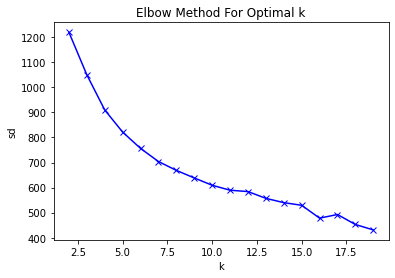

In [34]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sd')
plt.title('Elbow Method For Optimal k')
plt.show()

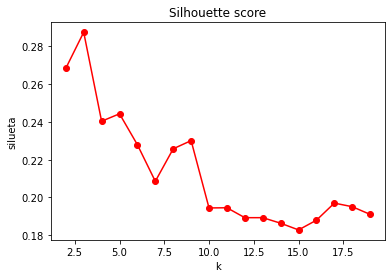

In [35]:
plt.plot(K, silueta, 'ro-')
plt.xlabel('k')
plt.ylabel('silueta')
plt.title('Silhouette score')
plt.show()

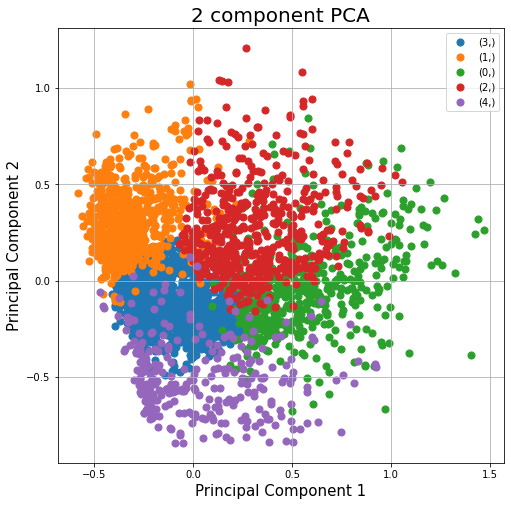

In [36]:
km = KMeans(n_clusters=5, init='random',
        n_init=10, tol=1e-04, random_state=5)
km_y = km.fit(X)
plot_pca(km_y.labels_,X)

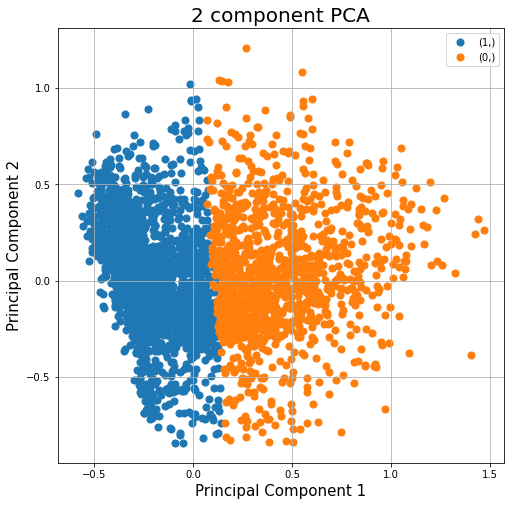

In [37]:
km = KMeans(n_clusters=2, init='random',
        n_init=10, tol=1e-04, random_state=5)
km_y = km.fit(X)
plot_pca(km_y.labels_,X)

## 3.2 Clustering jerarquico

In [ ]:
silueta=[]
N = range(2,20)
for n in N:
    clustering = AgglomerativeClustering(n_clusters=n).fit(X)
    silhouette_avg = silhouette_score(X, clustering.labels_)
    silueta.append(silhouette_avg)

In [ ]:
plt.plot(N, silueta, 'ro-')
plt.xlabel('k')
plt.ylabel('silueta')
plt.title('Silhouette score')
plt.show()

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=1)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
clustering = AgglomerativeClustering(n_clusters=5).fit(X)
plot_pca(clustering.labels_, X)

In [ ]:
clustering = AgglomerativeClustering(n_clusters=2).fit(X)
plot_pca(clustering.labels_, X)

## 3.3 DBScan

In [ ]:
neighbors = NearestNeighbors(n_neighbors=12)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

In [ ]:
plt.plot(distances)

In [ ]:
clustering = DBSCAN(eps=0.35,min_samples=12).fit(X)
plot_pca(clustering.labels_, X)
silhouette_avg = silhouette_score(X, clustering.labels_)

In [ ]:
clustering = DBSCAN(eps=1,min_samples=2).fit(X)
silhouette_avg = silhouette_score(X, clustering.labels_)
plot_pca(clustering.labels_, X)

# 4. Corrección del modelo

In [ ]:
km = KMeans(n_clusters=2, init='random', n_init=10, tol=1e-04, random_state=5)
km_y = km.fit(X)

In [ ]:
df_X = pd.DataFrame(data=X, columns=["Limit_bal",
                              "Sex",
                              "Education",
                              "Marriage",
                              "Age",
                              "Total_Credit_Cards",
                              "Total_visits_bank",
                              "Total_visits_online",
                              "Total_calls_made"])
df_labels = pd.DataFrame(data=km_y.labels_, columns=["label"])

In [ ]:
mejor_modelo = pd.concat([df_X, df_labels], axis = 1)
mejor_modelo

In [ ]:
plt.rcParams['figure.figsize'] = [17, 17]
mejor_modelo.boxplot(by='label', layout=(5, 2))
plt.rcParams['figure.figsize'] = [6.4, 4.8]

In [ ]:
# Eliminaremos las variables que consideramos no son útiles para la tarea que queremos resolver, como la variable skin thickness
nuevo_X = mejor_modelo.drop(['Sex', "label"], axis=1)

In [ ]:
plot_pca(np.zeros(len(nuevo_X)), nuevo_X)

In [ ]:
plt.rcParams['figure.figsize'] = [5, 5]

## 4.1 K-Means

In [ ]:
Sum_of_squared_distances = []
silueta = []
K = range(2,20)
for k in K:
    km = KMeans(n_clusters=k, init='random',
        n_init=10, tol=1e-04, random_state=5)
    km_y = km.fit(nuevo_X)
    Sum_of_squared_distances.append(km_y.inertia_)
    silhouette_avg = silhouette_score(nuevo_X, km_y.labels_)
    silueta.append(silhouette_avg)

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sd')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
plt.plot(K, silueta, 'ro-')
plt.xlabel('k')
plt.ylabel('silueta')
plt.title('Silhouette score')
plt.show()

In [ ]:
km = KMeans(n_clusters=3, init='random',
        n_init=10, tol=1e-04, random_state=5)
km_y = km.fit(nuevo_X)
plot_pca(km_y.labels_,nuevo_X)

## 4.2 Clustering jerarquico

In [ ]:
silueta = []
N = range(2,20)
for n in N:
    clustering = AgglomerativeClustering(n_clusters=n).fit(X)
    silhouette_avg = silhouette_score(nuevo_X, clustering.labels_)
    silueta.append(silhouette_avg)

In [ ]:
plt.plot(N, silueta, 'ro-')
plt.xlabel('k')
plt.ylabel('silueta')
plt.title('Silhouette score')
plt.show()

In [ ]:
# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(nuevo_X)
plt.title('Hierarchical Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=1)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
clustering = AgglomerativeClustering(n_clusters=4).fit(nuevo_X)
plot_pca(clustering.labels_, nuevo_X)

## 4.3 DBScan

In [ ]:
neighbors = NearestNeighbors(n_neighbors=12)
neighbors_fit = neighbors.fit(nuevo_X)
distances, indices = neighbors_fit.kneighbors(nuevo_X)
distances = np.sort(distances, axis=0)
distances = distances[:,1]

In [ ]:
plt.plot(distances)

In [ ]:
clustering = DBSCAN(eps=0.32,min_samples=10).fit(nuevo_X)
plot_pca(clustering.labels_, nuevo_X)
silhouette_avg = silhouette_score(nuevo_X, clustering.labels_)

# 5. Modelo final

In [ ]:
clustering = KMeans(n_clusters=3, init='random', n_init=10, tol=1e-04, random_state=5).fit(nuevo_X)

In [ ]:
df_final = pd.DataFrame(data=nuevo_X, columns=["Limit_bal",
                                          "Education",
                                          "Marriage",
                                          "Age",
                                          "Total_Credit_Cards",
                                          "Total_visits_bank",
                                          "Total_visits_online",
                                          "Total_calls_made"])
df_labels = pd.DataFrame(data=km_y.labels_, columns=["label"])

In [ ]:
mejor_modelo = pd.concat([df_final, df_labels], axis = 1)
mejor_modelo

In [ ]:
plt.rcParams['figure.figsize'] = [17, 17]
mejor_modelo.boxplot(by='label', layout=(4, 2))
plt.rcParams['figure.figsize'] = [6.4, 4.8]

# 6. Final